In [1]:
# Load the 'Employee Productivity and Satisfaction HR Data' dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hr_dashboard_data.csv')

## 1. Distribution of Employee Satisfaction Rates

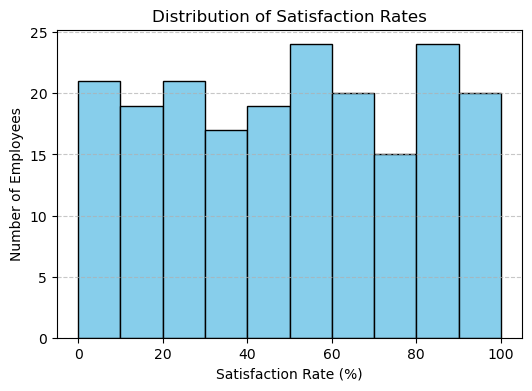

In [2]:
# Histogram of Satisfaction Rates
plt.figure(figsize=(6,4))
plt.hist(df['Satisfaction Rate (%)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Satisfaction Rates')
plt.xlabel('Satisfaction Rate (%)')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
df[['Satisfaction Rate (%)']].describe()

,Satisfaction Rate (%)
count,200.000000
mean,49.935000
std,28.934353
min,0.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


Interpretation: Satisfaction rate measures how happy and fulfilled employees are with their jobs, encompassing their overall experience and contentment with their roles and the workforce. The histogram shows a relatively uniform spread distributed across a 0-100% range. It shows slights peaks around 50-60% and a higher end at 80-90%. There is a modest number of very low satisfaction rates, even at 0%. The median satisfaction is about 50%. This broad distribution demonstrates that employee satisfaction varies greatly, with some employees extremely satisfied and others very dissatisfied.    

## 2. Distribution of Employee Productivity Scores

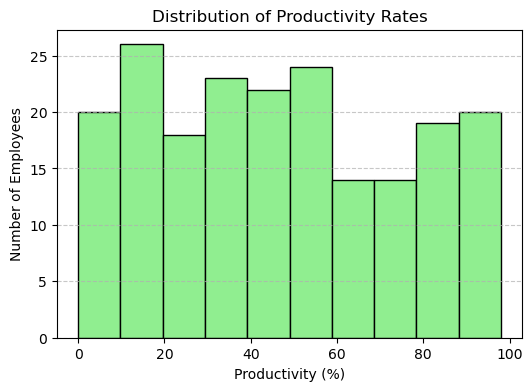

In [4]:
# Histogram of Productivity Scores
plt.figure(figsize=(6,4))
plt.hist(df['Productivity (%)'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Productivity Rates')
plt.xlabel('Productivity (%)')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
df[['Productivity (%)']].describe()

,Productivity (%)
count,200.000000
mean,46.755000
std,28.530068
min,0.000000
25%,23.000000
50%,45.000000
75%,70.000000
max,98.000000


Interpretation: Productivity rate measures employees’ performance in respect to their roles or departments that showcases employee engagement, capabilities, and overall organizational effectiveness. This segmentation helps identify high-performing employees at 80-100%, average performers at 40-60%, and those who may need additional support at 0-20%. Similarly to satisfactory distribution, the histogram for productivity rate is also widely spread revealing no single dominant productivity level.

## 3. Relationship Between Satisfaction and Productivity

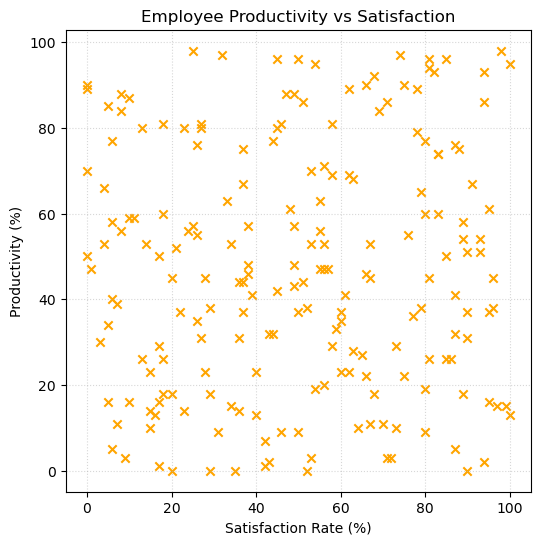

In [7]:
# Scatter Plot: Satisfaction vs Productivity
plt.figure(figsize=(6,6))
plt.scatter(df['Satisfaction Rate (%)'], df['Productivity (%)'], color='orange', marker='x')
plt.title('Employee Productivity vs Satisfaction')
plt.xlabel('Satisfaction Rate (%)')
plt.ylabel('Productivity (%)')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

Interpretation: The scatter plot shows no strong correlation between an employee’s satisfaction and their productivity. The points are widely scattered without a clear trend or slope. Employees with high satisfaction can be anywhere from low to high productivity, and highly productive employees span the full range of satisfaction. This suggests that job satisfaction and job performance are not directly linked in this dataset. In other words, a content employee isn’t necessarily more productive, and a top performer isn’t always happy – implying other factors influence each metric independently.

## 4. Satisfaction and Productivity by Gender

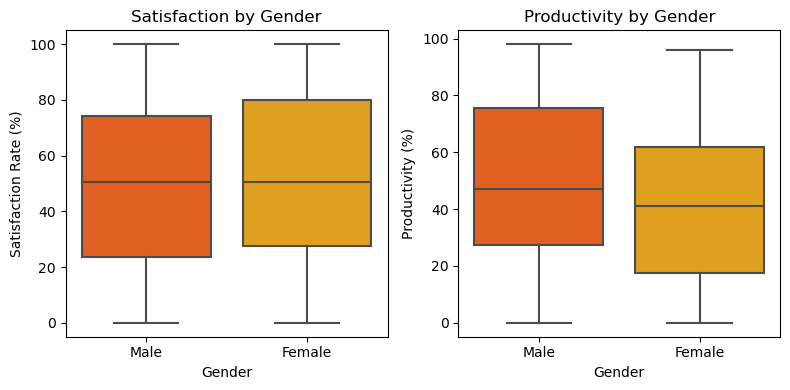

In [8]:
import seaborn as sns

# Boxplots: Satisfaction and Productivity by Gender
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.boxplot(x='Gender', y='Satisfaction Rate (%)', data=df, palette='autumn', ax=axes[0])
axes[0].set_title('Satisfaction by Gender')
axes[0].set_ylabel('Satisfaction Rate (%)')
sns.boxplot(x='Gender', y='Productivity (%)', data=df, palette='autumn', ax=axes[1])
axes[1].set_title('Productivity by Gender')
axes[1].set_ylabel('Productivity (%)')
plt.tight_layout()
plt.show()

In [9]:
df.groupby('Gender')[['Satisfaction Rate (%)']].describe()

Satisfaction Rate (%)                                                  
                       count   mean        std  min    25%   50%    75%    max
Gender                                                                        
Female                 100.0  51.25  28.495747  0.0  27.75  50.5  80.00  100.0
Male                   100.0  48.62  29.450791  0.0  23.75  50.5  74.25  100.0

In [10]:
df.groupby('Gender')[['Productivity (%)']].describe()

Productivity (%)                                                
                  count   mean        std  min   25%   50%    75%   max
Gender                                                                 
Female            100.0  42.97  28.235466  0.0  17.5  41.0  61.75  96.0
Male              100.0  50.54  28.459938  0.0  27.5  47.0  75.50  98.0

Interpretation: The box plots show that males and females have fairly similar distributions of satisfaction and productivity. The average productivity of male employees (50.5%) is above that of female employees (43.0%), while females have a slightly higher average satisfaction (51.3% vs 48.6% for males). However, the overlap in the interquartile ranges is substantial for both metrics, indicating that gender is not a strong differentiator for satisfaction or performance in this company. Both genders exhibit a wide range of outcomes, and any differences in central tendency are relatively small. This suggests that factors other than gender are more influential in driving satisfaction and productivity.

## 5. Productivity by Department

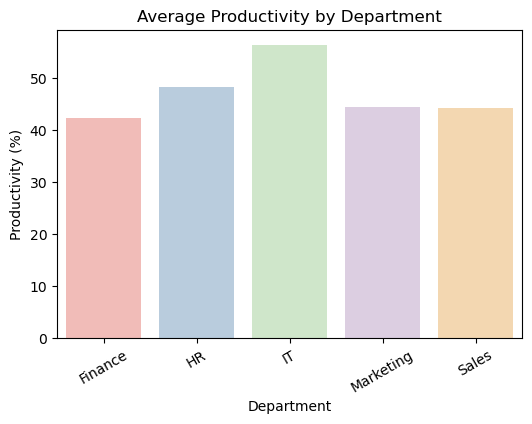

In [11]:
# Bar Chart: Average Productivity by Department
dept_prod = df.groupby('Department')['Productivity (%)'].agg(['mean','std'])
plt.figure(figsize=(6,4))
sns.barplot(x=dept_prod.index, y=dept_prod['mean'], palette='Pastel1', ci=None)
plt.title('Average Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Productivity (%)')
plt.xticks(rotation=30)
plt.show()

In [12]:
df.groupby('Department')['Productivity (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Finance,41.0,42.268293,24.443838,0.0,26.00,38.0,61.00,90.0
HR,32.0,48.125000,28.990265,0.0,21.75,51.5,68.00,98.0
IT,38.0,56.342105,30.615555,3.0,29.00,62.0,85.75,96.0
Marketing,42.0,44.261905,30.385378,0.0,15.25,44.0,62.00,97.0
Sales,47.0,44.212766,27.405122,1.0,19.00,42.0,57.00,98.0


Interpretation: IT stands out as the most productive department on average (mean 56%), whereas departments like Marketing, Sales, and Finance have lower average productivity (mid-40s%). HR shows slightly higher productivity (48%) than Marketing or Sales, but still lower than IT. The trend suggests that employees in technical IT roles are achieving higher output, which could be due to better processes, tools, or perhaps more measurable output. Differences like these might inform management where productivity best practices are happening internally. 

## 6. Satisfaction by Department

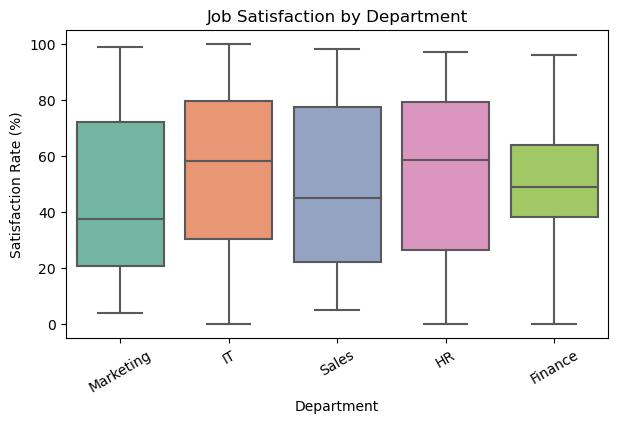

In [13]:
# Boxplot: Satisfaction Rate by Department
plt.figure(figsize=(7,4))
sns.boxplot(x='Department', y='Satisfaction Rate (%)', data=df, palette='Set2')
plt.title('Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=30)
plt.show()

In [14]:
df.groupby('Department')['Satisfaction Rate (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Finance,41.0,50.048780,24.350515,0.0,38.00,49.0,64.00,96.0
HR,32.0,51.625000,30.893939,0.0,26.50,58.5,79.25,97.0
IT,38.0,54.342105,30.141357,0.0,30.25,58.0,79.50,100.0
Marketing,42.0,46.023810,29.793180,4.0,20.75,37.5,72.25,99.0
Sales,47.0,48.617021,30.121171,5.0,22.00,45.0,77.50,98.0


Interpretation:Job satisfaction varies by department. HR and IT departments show higher median satisfaction (58%) (upper-50%s) compared to Marketing, which has the lowest median satisfaction (37.5%). Sales and Finance are in between (medians roughly in the high 40s). HR and IT in particular not only has a high median satisfaction but also a relatively high upper range (many HR and IT employees report satisfaction above 60%). In contrast, Marketing staff often report lower satisfaction, which could point to job stress or unmet expectations in that department. These departmental satisfaction differences are important, as they could relate to turnover rates or morale; managers may need to pay extra attention to departments like Marketing where satisfaction is lagging.

## 7. Satisfaction by Job Position

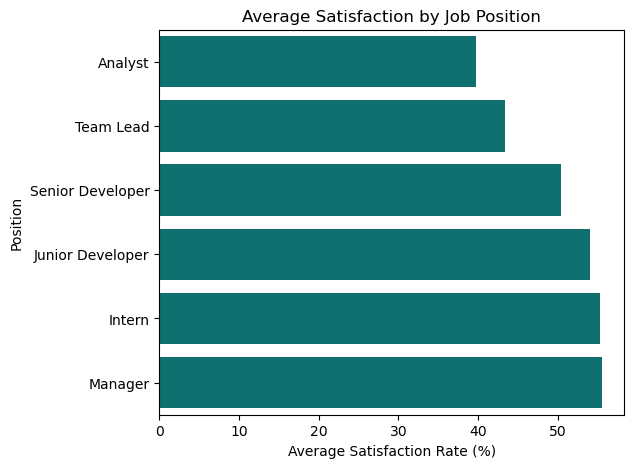

In [15]:
# Bar Chart: Average Satisfaction by Job Position
pos_sat = df.groupby('Position')['Satisfaction Rate (%)'].mean().sort_values()
plt.figure(figsize=(6,5))
sns.barplot(x=pos_sat.values, y=pos_sat.index, color='teal')
plt.title('Average Satisfaction by Job Position')
plt.xlabel('Average Satisfaction Rate (%)')
plt.ylabel('Position')
plt.show()

In [16]:
df.groupby('Position')[['Satisfaction Rate (%)']].describe()

Satisfaction Rate (%)                                    \
                                 count       mean        std  min    25%   
Position                                                                   
Analyst                           33.0  39.787879  24.129543  8.0  20.00   
Intern                            30.0  55.266667  29.971174  0.0  36.75   
Junior Developer                  35.0  54.057143  30.110525  3.0  30.50   
Manager                           40.0  55.575000  30.571386  1.0  24.75   
Senior Developer                  30.0  50.400000  28.215427  0.0  28.75   
Team Lead                         32.0  43.406250  27.864719  0.0  20.00   

                                      
                   50%    75%    max  
Position                              
Analyst           39.0  53.00   90.0  
Intern            56.0  81.00   97.0  
Junior Developer  53.0  79.50  100.0  
Manager           61.5  82.00  100.0  
Senior Developer  55.0  68.50   98.0  
Team Lead         37.5  62.25   96.0

Interpretation: Managers and Interns top the satisfaction rankings, with managers averaging about 55.6% satisfaction and interns about 55.3%. It might be surprising that interns are as satisfied as managers – this could be due to interns’ excitement and learning opportunities despite lower pay. Junior Developers and Managers also have relatively high satisfaction (54%-55%). On the lower end, Analysts and Team Leads report lower satisfaction on average (around 39-43%). Senior Developers are in the middle (50%). This suggests that higher leadership roles (Managers) and entry-level roles (Interns) enjoy higher satisfaction, whereas mid-level positions (Team Leads, Analysts) might feel more pressure or less contentment. Such insight hints at a potential mid-level satisfaction gap where those in between top leadership and entry level might need more support or recognition.

## 8. Productivity by Job Position

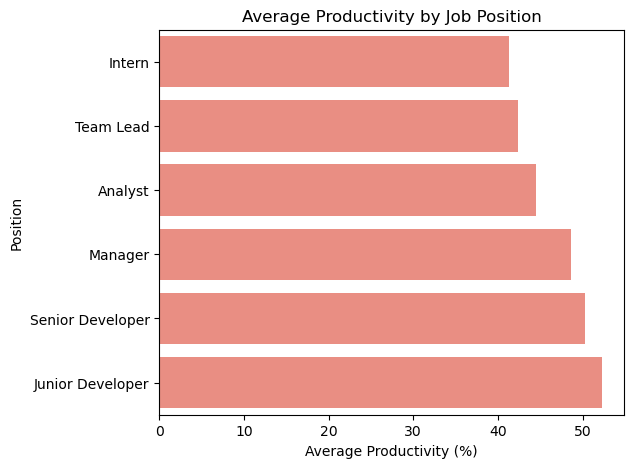

In [17]:
# Bar Chart: Average Productivity by Job Position
pos_prod = df.groupby('Position')['Productivity (%)'].mean().sort_values()
plt.figure(figsize=(6,5))
sns.barplot(x=pos_prod.values, y=pos_prod.index, color='salmon')
plt.title('Average Productivity by Job Position')
plt.xlabel('Average Productivity (%)')
plt.ylabel('Position')
plt.show()

In [18]:
df.groupby('Position')[['Productivity (%)']].describe()

Productivity (%)                                          \
                            count       mean        std  min    25%   50%   
Position                                                                    
Analyst                      33.0  44.545455  27.093693  0.0  23.00  41.0   
Intern                       30.0  41.333333  31.924840  0.0  13.50  33.5   
Junior Developer             35.0  52.314286  28.591207  1.0  27.50  48.0   
Manager                      40.0  48.675000  27.421111  2.0  25.25  51.5   
Senior Developer             30.0  50.233333  28.596700  0.0  29.00  51.5   
Team Lead                    32.0  42.375000  28.312484  0.0  21.00  40.5   

                               
                    75%   max  
Position                       
Analyst           59.00  97.0  
Intern            66.75  95.0  
Junior Developer  76.50  96.0  
Manager           68.25  98.0  
Senior Developer  74.00  98.0  
Team Lead         55.00  97.0

Interpretation: Junior Developers have the highest average productivity (52.3%), which suggests that this group (often early-career tech employees) is very output-focused. Senior Developers and Managers also show fairly high productivity (48%-50%). On the lower side, Team Leads and Analysts have lower average productivity (around 42-44%). Interns unsurprisingly have the lowest average productivity (41%), likely due to lack of experience and still being in learning phases. Interestingly, despite managers being less hands-on, their productivity percentage is reasonably high – possibly reflecting that their performance is also measured in the dataset by similar metrics or that they contribute significantly through oversight. The spread in productivity across roles indicates how workload and expectations differ by position. **Coupling this with the previous insight, one notable pattern is that Team Leads and Analysts are both low in satisfaction and productivity, suggesting possible role challenges or burnout that could be addressed.**

## 9. Age and the Satisfaction-Productivity Trade-off

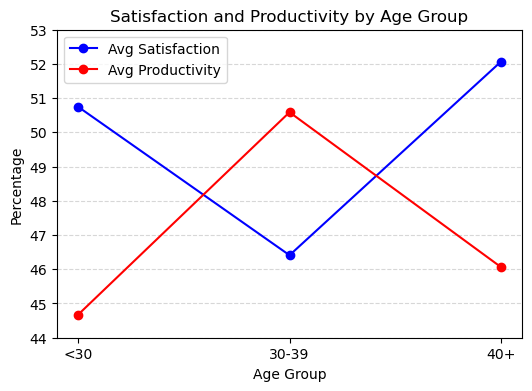

In [20]:
# Line Plot: Satisfaction and Productivity by Age Group
age_groups = pd.cut(df['Age'], bins=[0,29,39,100], labels=['<30','30-39','40+'])
age_stats = df.groupby(age_groups)[['Satisfaction Rate (%)','Productivity (%)']].mean()

plt.figure(figsize=(6,4))
plt.plot(age_stats.index, age_stats['Satisfaction Rate (%)'], marker='o', label='Avg Satisfaction', color='blue')
plt.plot(age_stats.index, age_stats['Productivity (%)'], marker='o', label='Avg Productivity', color='red')
plt.title('Satisfaction and Productivity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.ylim(44, 53)  # focusing on the range of interest
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [22]:
df.groupby(age_groups)[['Satisfaction Rate (%)', 'Productivity (%)']].mean()

,Satisfaction Rate (%),Productivity (%)
Age,,
<30,50.746988,44.674699
30-39,46.410714,50.589286
40+,52.065574,46.065574


Interpretation: The lines cross, indicating an inverse relationship trend by age group. Under-30 employees have fairly high satisfaction (50.7%) but lower productivity (44.7%). 30–39 year-olds are the opposite: they achieve the highest productivity (50.6%) but have the lowest satisfaction (46.4%). Employees 40 and above see satisfaction rise again to the highest level (52.1%), while productivity declines (46.1%). This reflects a likely mid-career satisfaction slump: employees in their 30s are driving output but may experience more stress or dissatisfaction (possibly due to greater responsibilities or plateauing growth). Younger employees tend to be optimistic (higher satisfaction) but still gaining efficiency (lower productivity), whereas older employees might value stability and have adjusted expectations (hence higher satisfaction) while perhaps not working as intensively as in mid-career. 

It would be interesting to explore how these findings bind with salary. 